In [ ]:
%matplotlib inline
!pip install pandas numpy matplotlib scikit-learn tensorflow pydot
from pathlib import Path
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [ ]:
train_acc_x = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt',
            header=None, delim_whitespace=True).values
train_acc_y = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt',
            header=None, delim_whitespace=True).values
train_acc_z = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt',
            header=None, delim_whitespace=True).values

test_acc_x = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt',
            header=None, delim_whitespace=True).values
test_acc_y = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt',
            header=None, delim_whitespace=True).values
test_acc_z = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt',
            header=None, delim_whitespace=True).values

WARNING    /tmp/ipython-input-1650796362.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_acc_x = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt',
 [py.warnings]
  train_acc_x = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt',

WARNING    /tmp/ipython-input-1650796362.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_acc_y = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt',
 [py.warnings]
  train_acc_y = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Da

In [ ]:
loaded_x = np.concatenate((train_acc_x, test_acc_x))
loaded_y = np.concatenate((train_acc_y, test_acc_y))
loaded_z = np.concatenate((train_acc_z, test_acc_z))

In [ ]:
y_acc_train = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt',
                        header = None, delim_whitespace = True).values
y_acc_test = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt',
                        header = None, delim_whitespace = True).values

y_loaded = np.concatenate((y_acc_train, y_acc_test))

y_loaded.shape

WARNING    /tmp/ipython-input-3103287823.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_acc_train = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt',
 [py.warnings]
  y_acc_train = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt',

WARNING    /tmp/ipython-input-3103287823.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_acc_test = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt',
 [py.warnings]
  y_acc_test = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt',



(10299, 1)

In [ ]:
X_loaded = list()

X_loaded.append(loaded_x)
X_loaded.append(loaded_y)
X_loaded.append(loaded_z)

X_loaded = np.dstack(X_loaded)

# Split data into train and test sets
trainX, testX, trainy, testy = train_test_split(X_loaded, y_loaded, test_size=0.3, random_state=42)

# Convert labels to categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical
trainy = to_categorical(trainy - 1) # Subtract 1 to make labels 0-indexed
testy = to_categorical(testy - 1) # Subtract 1 to make labels 0-indexed


print(f"X_loaded shape: {X_loaded.shape}")
print(f"trainX shape: {trainX.shape}")
print(f"trainy shape: {trainy.shape}")
print(f"testX shape: {testX.shape}")
print(f"testy shape: {testy.shape}")

X_loaded shape: (10299, 128, 3)
trainX shape: (7209, 128, 3)
trainy shape: (7209, 6)
testX shape: (3090, 128, 3)
testy shape: (3090, 6)


In [ ]:
verbose, epochs, batch_size = 0, 50, 64
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

model_1 = Sequential()
model_1.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(n_outputs, activation='softmax'))
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

WARNING    /usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
 [py.warnings]
  super().__init__(**kwargs)



In [ ]:
history = model_1.fit(trainX, trainy, epochs=50, batch_size=64, validation_split = 0.3, verbose=1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 393ms/step - accuracy: 0.4215 - loss: 1.4373 - val_accuracy: 0.5386 - val_loss: 1.0650
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 188ms/step - accuracy: 0.5251 - loss: 1.0668 - val_accuracy: 0.5455 - val_loss: 1.0204
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.5293 - loss: 1.0439 - val_accuracy: 0.5525 - val_loss: 1.0077
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.5353 - loss: 1.0712 - val_accuracy: 0.5585 - val_loss: 1.0166
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.5408 - loss: 1.0411 - val_accuracy: 0.5562 - val_loss: 1.0019
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 196ms/step - accuracy: 0.5588 - loss: 0.9969 - val_accuracy: 0.5719 - val_loss: 0.9581
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - accuracy: 0.5965 - loss: 0.9364 - val_accuracy: 0.6856 - val_loss: 0.7271
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 182ms/step - accuracy: 0.6948 - loss: 0.6574 - val_accu

In [ ]:
_, accuracy = model_1.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print(accuracy)

0.9355987310409546


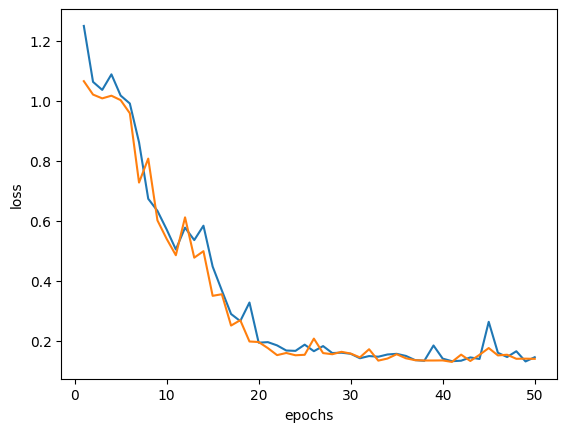

In [ ]:
# Loss
epochs = np.arange(1,51)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

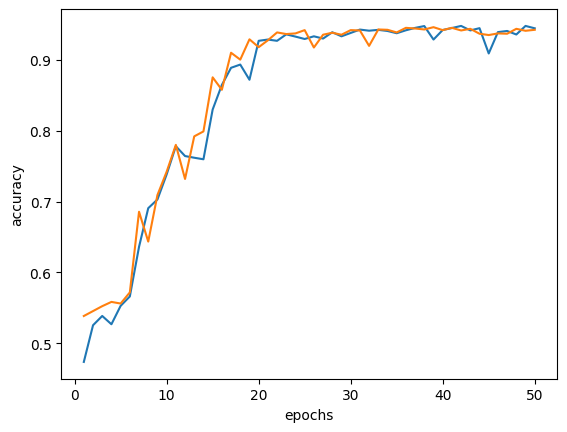

In [ ]:
# Accuracy

epochs = np.arange(1,51)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
verbose, epochs, batch_size = 0, 50, 64
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

model_2 = Sequential()
model_2.add(LeakyReLU(0.2))
model_2.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(n_outputs, activation='softmax'))
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_2.fit(trainX, trainy, epochs=50, batch_size=64, validation_split = 0.3, verbose=0)

In [ ]:
_, accuracy = model_2.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print(accuracy)

0.9304206967353821


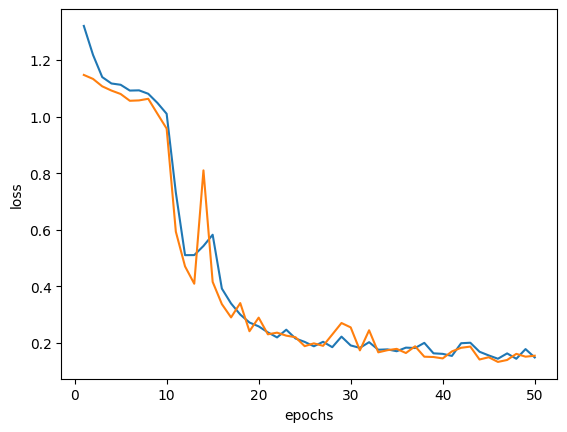

In [ ]:
# Loss
epochs = np.arange(1,51)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

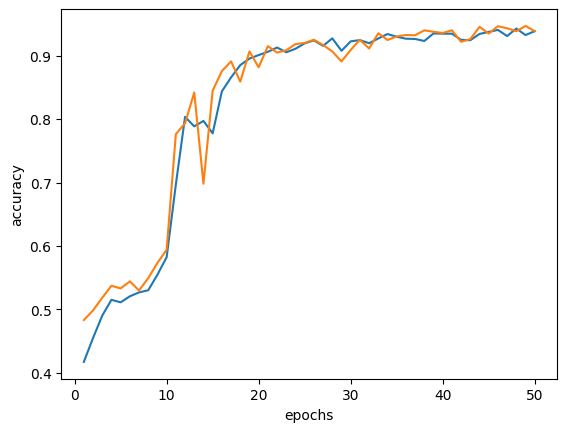

In [ ]:
# Accuracy

epochs = np.arange(1,51)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
verbose, epochs, batch_size = 0, 50, 64
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

model_3 = Sequential()
model_3.add(LeakyReLU(0.2))
model_3.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model_3.add(Dropout(0.5))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(n_outputs, activation='softmax'))
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_3.fit(trainX, trainy, epochs=50, batch_size=64, validation_split = 0.3, verbose=0)

In [ ]:
_, accuracy = model_3.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print(accuracy)

0.477669894695282


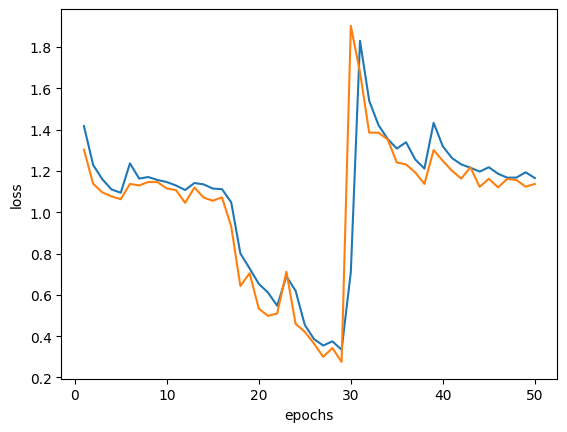

In [ ]:
# Loss
epochs = np.arange(1,51)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

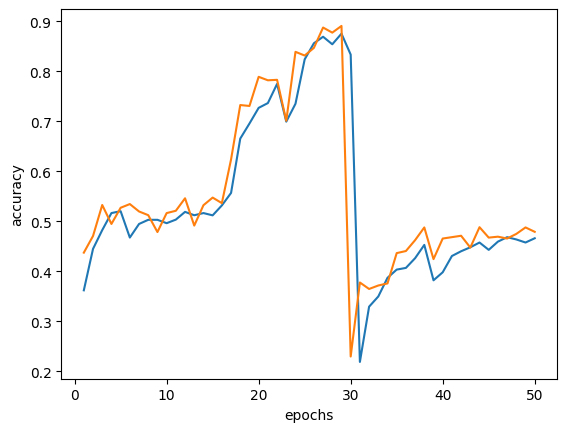

In [ ]:
# Accuracy

epochs = np.arange(1,51)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
verbose, epochs, batch_size = 0, 50, 64
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

model_4 = Sequential()
model_4.add(layers.Conv1D(32, 5, activation = 'relu', input_shape = (n_timesteps, n_features)))
model_4.add(layers.MaxPooling1D(3))
model_4.add(LeakyReLU(0.2))
model_4.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model_4.add(Dense(100, activation='relu'))
model_4.add(Dense(n_outputs, activation='softmax'))
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

WARNING    /usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
 [py.warnings]
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



In [ ]:
history = model_4.fit(trainX, trainy, epochs=50, batch_size=64, validation_split = 0.3, verbose=0)

In [ ]:
_, accuracy = model_4.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print(accuracy)

0.9372168183326721


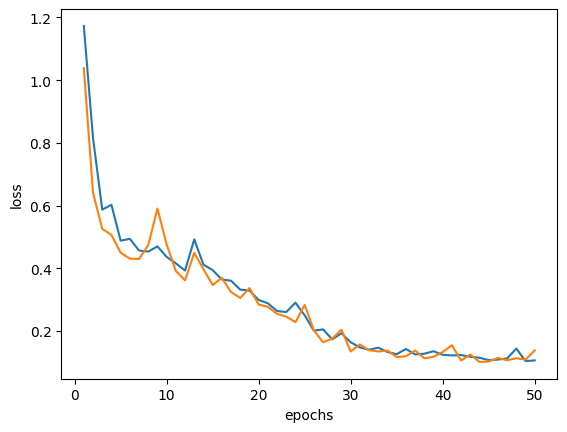

In [ ]:
# Loss
epochs = np.arange(1,51)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

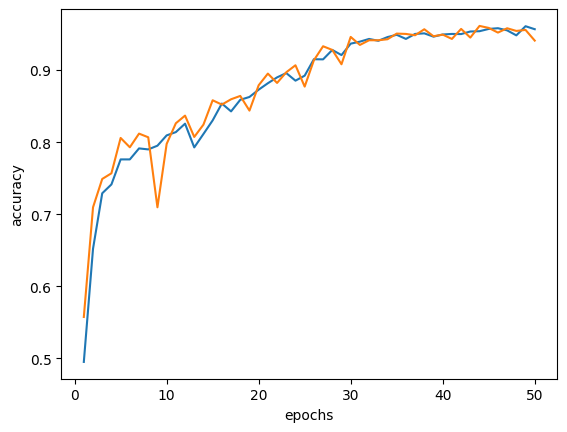

In [ ]:
# Accuracy

epochs = np.arange(1,51)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
verbose, epochs, batch_size = 0, 50, 64
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

model_5 = Sequential()
model_5.add(layers.GRU(4, return_sequences=True))
model_5.add(LeakyReLU(0.2))
model_5.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model_5.add(Dense(100, activation='relu'))
model_5.add(Dense(n_outputs, activation='softmax'))
model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_5.fit(trainX, trainy, epochs=50, batch_size=64, validation_split = 0.3, verbose=0)

In [ ]:
_, accuracy = model_5.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print(accuracy)

0.8501617908477783


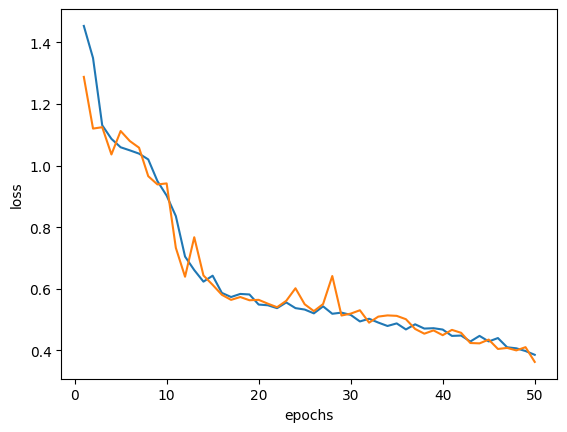

In [ ]:
# Loss
epochs = np.arange(1,51)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

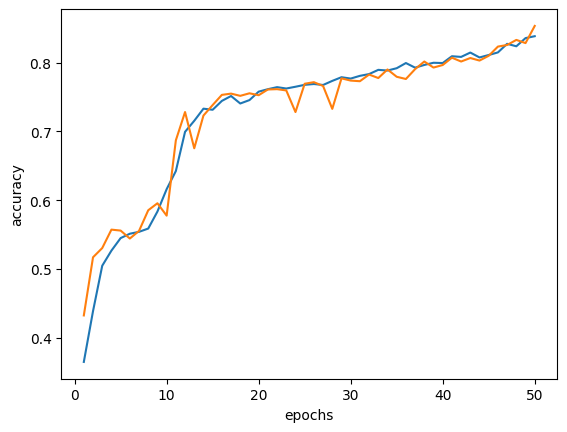

In [ ]:
# Accuracy

epochs = np.arange(1,51)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Testing


In [ ]:
show_x = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt',
            header=None, delim_whitespace=True).sample(n=5).values
show_y = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt',
            header=None, delim_whitespace=True).sample(n=5).values
show_z = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt',
            header=None, delim_whitespace=True).sample(n=5).values

WARNING    /tmp/ipython-input-2209459510.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  show_x = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt',
 [py.warnings]
  show_x = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt',

WARNING    /tmp/ipython-input-2209459510.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  show_y = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt',
 [py.warnings]
  show_y = pd.read_csv('/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signal

In [ ]:
X_show = list()

X_show.append(show_x)
X_show.append(show_y)
X_show.append(show_z)

X_show = np.dstack(X_show)

X_show.shape

(5, 128, 3)

In [ ]:
predictions = model_4.predict(X_show)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
[1 3 1 0 3]


## Explore snn concepts and architectures

### Subtask:
Briefly explain what Spiking Neural Networks are and research suitable SNN architectures for time-series data like the human activity recognition dataset.


**Reasoning**:
Provide a markdown cell to explain Spiking Neural Networks and suitable architectures for time-series data as per the instructions.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:49: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:49: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2442956285.py:35: SyntaxWarning: invalid escape sequence '\s'
  train_acc_x = pd.read_csv(f'{base_path}train/Inertial Signals/total_acc_x_train.txt', header=None, se

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 3.1 MB/s eta 0:00:00
Mounted at /content/drive
Epoch [1/20], Step [10/65], Loss: 55.4266, Accuracy: 0.4531
Epoch [1/20], Step [20/65], Loss: 17.1092, Accuracy: 0.4531
Epoch [1/20], Step [30/65], Loss: 9.4310, Accuracy: 0.4219
Epoch [1/20], Step [40/65], Loss: 3.7992, Accuracy: 0.5859
Epoch [1/20], Step [50/65], Loss: 1.7664, Accuracy: 0.6953
Epoch [1/20], Step [60/65], Loss: 1.7713, Accuracy: 0.6406
Epoch [2/20], Step [10/65], Loss: 0.9814, Accuracy: 0.7578
Epoch [2/20], Step [20/65], Loss: 1.5553, Accuracy: 0.7344
Epoch [2/20], Step [30/65], Loss: 0.6677, Accuracy: 0.7656
Epoch [2/20], Step [40/65], Loss: 0.9483, Accuracy: 0.7266
Epoch [2/20], Step [50/65], Loss: 0.8567, Accuracy: 0.7500
Epoch [2/20], Step [60/65], Loss: 1.0728, Accuracy: 0.7266
Epoch [3/20], Step [10/65], Loss: 0.5481, Accuracy: 0.8281
Epoch [3/20], Step [20/65], Loss: 0.7417, Accuracy: 0.7734
Epoch [3/20], Step [30/65], Loss: 0.6274, Accuracy: 0.7891
Epoch [

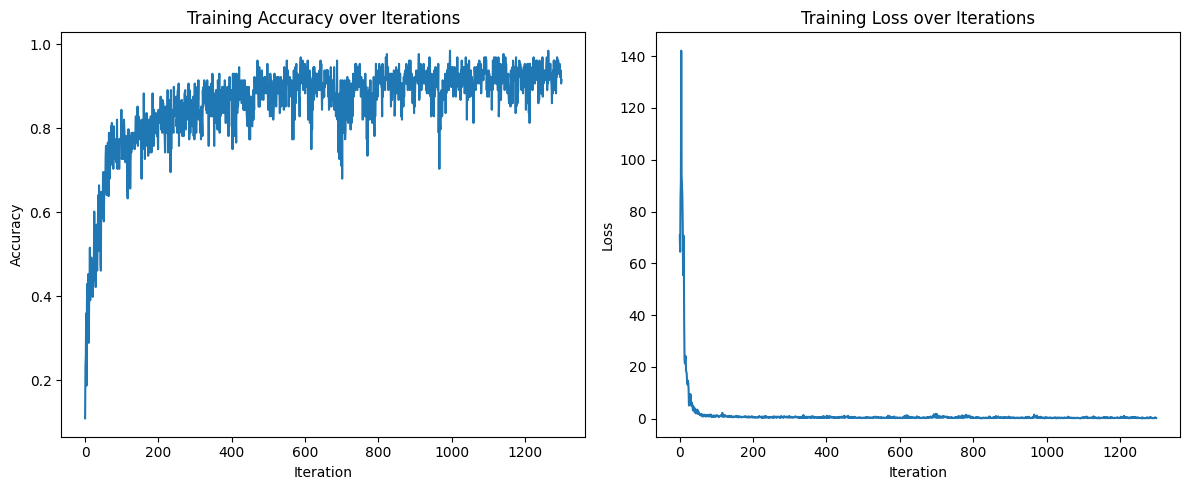

Final Test Accuracy: 0.8660194174757282


In [ ]:
%matplotlib inline
!pip install snntorch
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen
import matplotlib.pyplot as plt
from snntorch import surrogate
import torch.nn.functional as F

# Mount Google Drive
drive.mount('/content/drive')

# --- Data Preparation ---
class HARDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.from_numpy(data).float()
        self.labels = torch.from_numpy(labels).long().squeeze() - 1

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

def load_har_data(base_path):
    """Loads HAR dataset from Google Drive."""
    train_acc_x = pd.read_csv(f'{base_path}train/Inertial Signals/total_acc_x_train.txt', header=None, sep='\s+').values
    train_acc_y = pd.read_csv(f'{base_path}train/Inertial Signals/total_acc_y_train.txt', header=None, sep='\s+').values
    train_acc_z = pd.read_csv(f'{base_path}train/Inertial Signals/total_acc_z_train.txt', header=None, sep='\s+').values

    test_acc_x = pd.read_csv(f'{base_path}test/Inertial Signals/total_acc_x_test.txt', header=None, sep='\s+').values
    test_acc_y = pd.read_csv(f'{base_path}test/Inertial Signals/total_acc_y_test.txt', header=None, sep='\s+').values
    test_acc_z = pd.read_csv(f'{base_path}test/Inertial Signals/total_acc_z_test.txt', header=None, sep='\s+').values

    loaded_x = np.concatenate((train_acc_x, test_acc_x))
    loaded_y = np.concatenate((train_acc_y, test_acc_y))
    loaded_z = np.concatenate((train_acc_z, test_acc_z))
    X_loaded = np.dstack((loaded_x, loaded_y, loaded_z))

    y_acc_train = pd.read_csv(f'{base_path}train/y_train.txt', header=None, sep='\s+').values
    y_acc_test = pd.read_csv(f'{base_path}test/y_test.txt', header=None, sep='\s+').values
    y_loaded = np.concatenate((y_acc_train, y_acc_test))

    X_loaded = X_loaded / X_loaded.max()

    X_train, X_test, y_train, y_test = train_test_split(
        X_loaded, y_loaded, test_size=0.2, random_state=42, stratify=y_loaded
    )

    train_dataset = HARDataset(X_train, y_train)
    test_dataset = HARDataset(X_test, y_test)

    return train_dataset, test_dataset

# Set path and load data
COLAB_PATH = '/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/'
train_dataset, test_dataset = load_har_data(COLAB_PATH)

# Set up DataLoaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# --- SNN Model Architecture ---
num_timesteps = train_dataset.data.shape[1]
num_features = train_dataset.data.shape[2]
num_outputs = 6
hidden_size = 256 # Increased hidden layer size

# Optimized CNN-SNN hybrid model
class CNN_SNN(nn.Module):
    def __init__(self, num_inputs, num_hiddens, num_outputs, num_steps):
        super().__init__()
        self.num_steps = num_steps

        # CNN layer to extract features from time-series
        self.conv1 = nn.Conv1d(in_channels=num_inputs, out_channels=32, kernel_size=5, padding=2)
        self.pool1 = nn.MaxPool1d(kernel_size=2)

        # Calculate the size of the output from the CNN layer
        conv_output_size = 32 * (num_steps // 2)

        # SNN layers
        self.fc1 = nn.Linear(conv_output_size, num_hiddens)
        self.lif1 = snn.Leaky(beta=0.9, spike_grad=surrogate.atan()) # Use a different surrogate gradient
        self.fc2 = nn.Linear(num_hiddens, num_outputs)
        self.lif2 = snn.Leaky(beta=0.9, spike_grad=surrogate.atan())

    def forward(self, data):
        # Transpose data to fit Conv1D format (batch, channels, length)
        data = data.permute(0, 2, 1)

        # Pass through CNN layers
        cnn_out = self.pool1(F.relu(self.conv1(data)))

        # Flatten the output for the fully-connected SNN layers
        cnn_out = cnn_out.reshape(cnn_out.shape[0], -1)

        # Initialize hidden states
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()

        spike_record = []
        mem_record = []

        # Iterate over time steps (although CNN is not time-stepped, the output is)
        # We will feed the same CNN features at each time step
        for step in range(self.num_steps):
            cur1 = self.fc1(cnn_out)
            spk1, mem1 = self.lif1(cur1, mem1)

            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)

            spike_record.append(spk2)
            mem_record.append(mem2)

        return torch.stack(spike_record, dim=0), torch.stack(mem_record, dim=0)

# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_SNN(
    num_inputs=num_features,
    num_hiddens=hidden_size,
    num_outputs=num_outputs,
    num_steps=num_timesteps
).to(device)

# --- Training and Testing Functions ---
def train_loop(model, train_loader, optimizer, num_epochs=10):
    loss_hist = []
    acc_hist = []

    for epoch in range(num_epochs):
        model.train()
        for i, (data, labels) in enumerate(train_loader):
            data = data.to(device)
            labels = labels.to(device)

            spk_out, mem_out = model(data)

            loss = F.cross_entropy(mem_out.sum(dim=0), labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_hist.append(loss.item())

            _, predicted = torch.max(mem_out.sum(dim=0), 1)
            accuracy = (predicted == labels).sum().item() / labels.size(0)
            acc_hist.append(accuracy)

            if (i+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

    return loss_hist, acc_hist

def test_loop(model, test_loader):
    with torch.no_grad():
        model.eval()
        total_correct = 0
        total_samples = 0

        for data, labels in test_loader:
            data = data.to(device)
            labels = labels.to(device)

            spk_out, mem_out = model(data)

            _, predicted = torch.max(mem_out.sum(dim=0), 1)

            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()

        accuracy = total_correct / total_samples
        print(f"\nTest set: Accuracy: {accuracy:.4f}\n")
    return accuracy

# --- Run the model ---
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005) # Decreased learning rate
num_epochs = 20 # Increased epochs
loss_history, acc_history = train_loop(model, train_loader, optimizer, num_epochs)
test_accuracy = test_loop(model, test_loader)

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc_history)
plt.title('Training Accuracy over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.title('Training Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

print(f"Final Test Accuracy: {test_accuracy}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Starting Training ---
Epoch [1/30], Step [10/65], Loss: 1.3993
Epoch [1/30], Step [20/65], Loss: 1.1991
Epoch [1/30], Step [30/65], Loss: 0.9696
Epoch [1/30], Step [40/65], Loss: 1.0948
Epoch [1/30], Step [50/65], Loss: 0.8177
Epoch [1/30], Step [60/65], Loss: 0.8030
Epoch [2/30], Step [10/65], Loss: 0.6848
Epoch [2/30], Step [20/65], Loss: 0.5738
Epoch [2/30], Step [30/65], Loss: 0.5520
Epoch [2/30], Step [40/65], Loss: 0.5810
Epoch [2/30], Step [50/65], Loss: 0.4830
Epoch [2/30], Step [60/65], Loss: 0.5357
Epoch [3/30], Step [10/65], Loss: 0.5204
Epoch [3/30], Step [20/65], Loss: 0.4847
Epoch [3/30], Step [30/65], Loss: 0.4777
Epoch [3/30], Step [40/65], Loss: 0.4781
Epoch [3/30], Step [50/65], Loss: 0.4521
Epoch [3/30], Step [60/65], Loss: 0.5023
Epoch [4/30], Step [10/65], Loss: 0.4829
Epoch [4/30], Step [20/65], Loss: 0.4896
Epoch [4/30], Step [30/65

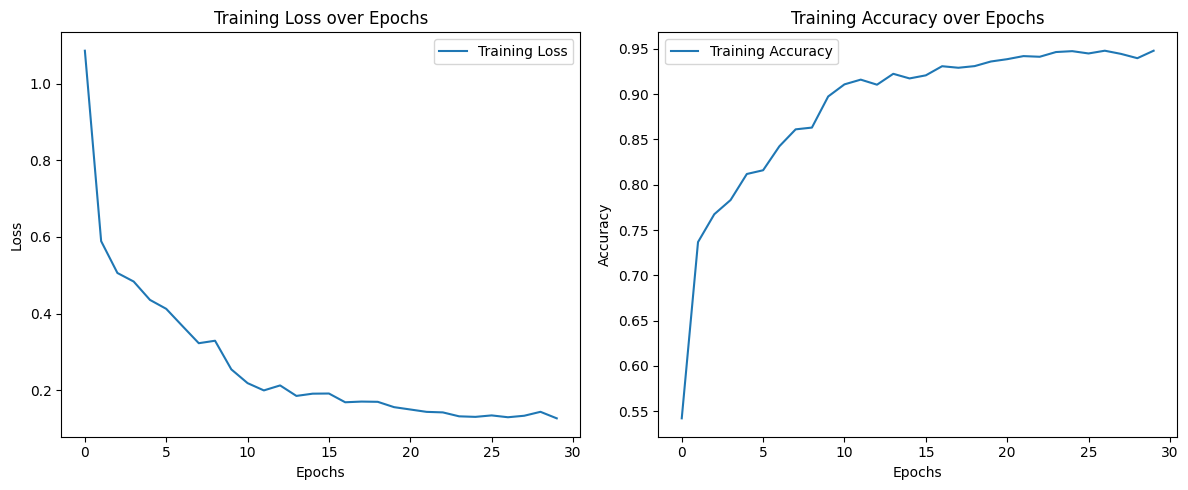

Generating Latent Space Plots...


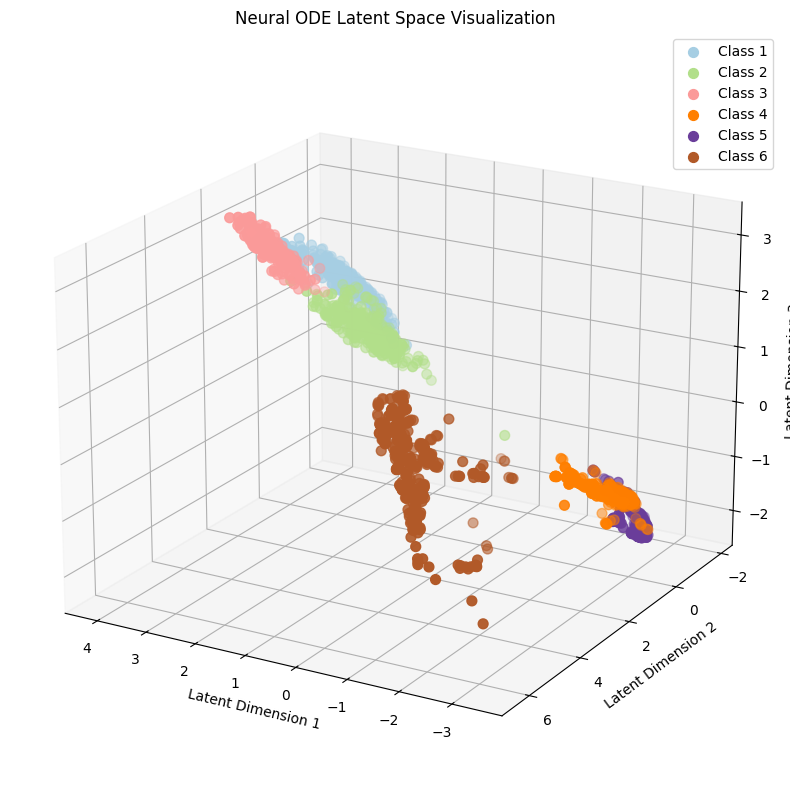

Plotting Trajectory for a sample of Class 3...


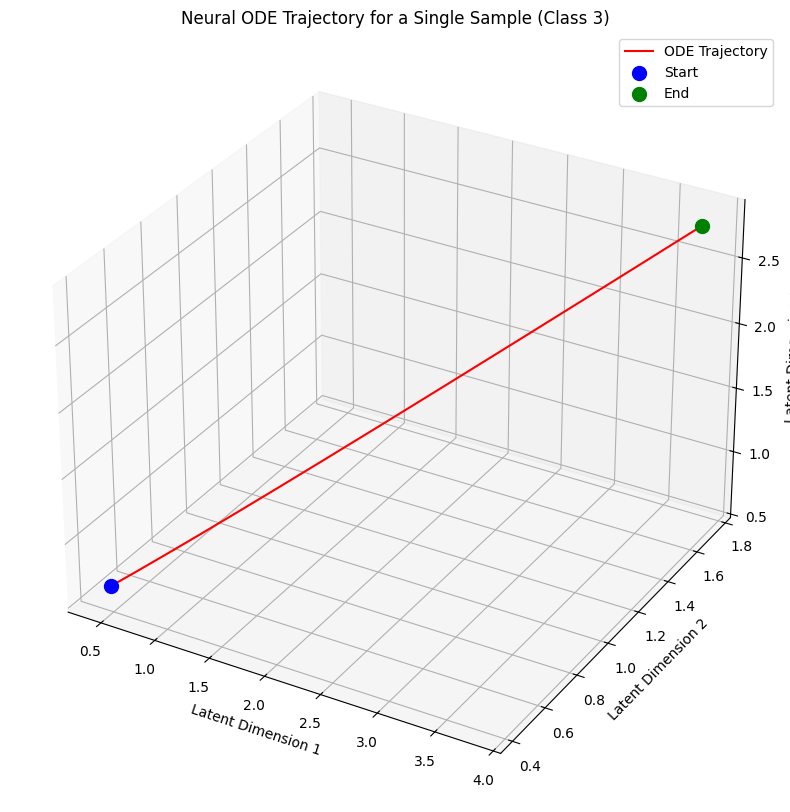

In [6]:
!pip install torchdiffeq
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torchdiffeq import odeint_adjoint as odeint
import torch.nn.functional as F
import matplotlib.pyplot as plt
from google.colab import drive
import warnings
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Ignore UserWarnings from the notebook
warnings.filterwarnings('ignore')

# Mount Google Drive
drive.mount('/content/drive')

# --- Data Preparation ---
class HARDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.from_numpy(data).float()
        self.labels = torch.from_numpy(labels).long().squeeze() - 1

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

def load_har_data(base_path):
    """Loads HAR dataset from Google Drive."""
    # Corrected: Use raw strings (r'') to avoid SyntaxWarning
    train_acc_x = pd.read_csv(f'{base_path}train/Inertial Signals/total_acc_x_train.txt', header=None, sep=r'\s+').values
    train_acc_y = pd.read_csv(f'{base_path}train/Inertial Signals/total_acc_y_train.txt', header=None, sep=r'\s+').values
    train_acc_z = pd.read_csv(f'{base_path}train/Inertial Signals/total_acc_z_train.txt', header=None, sep=r'\s+').values

    test_acc_x = pd.read_csv(f'{base_path}test/Inertial Signals/total_acc_x_test.txt', header=None, sep=r'\s+').values
    test_acc_y = pd.read_csv(f'{base_path}test/Inertial Signals/total_acc_y_test.txt', header=None, sep=r'\s+').values
    test_acc_z = pd.read_csv(f'{base_path}test/Inertial Signals/total_acc_z_test.txt', header=None, sep=r'\s+').values

    loaded_x = np.concatenate((train_acc_x, test_acc_x))
    loaded_y = np.concatenate((train_acc_y, test_acc_y))
    loaded_z = np.concatenate((train_acc_z, test_acc_z))
    X_loaded = np.dstack((loaded_x, loaded_y, loaded_z))

    y_acc_train = pd.read_csv(f'{base_path}train/y_train.txt', header=None, sep=r'\s+').values
    y_acc_test = pd.read_csv(f'{base_path}test/y_test.txt', header=None, sep=r'\s+').values
    y_loaded = np.concatenate((y_acc_train, y_acc_test))

    X_loaded = X_loaded / X_loaded.max()

    X_train, X_test, y_train, y_test = train_test_split(
        X_loaded, y_loaded, test_size=0.2, random_state=42, stratify=y_loaded
    )

    train_dataset = HARDataset(X_train, y_train)
    test_dataset = HARDataset(X_test, y_test)

    return train_dataset, test_dataset

# Load data and create DataLoaders
COLAB_PATH = '/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/'
train_dataset, test_dataset = load_har_data(COLAB_PATH)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# --- Neural ODE Model ---
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class ODEFunc(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(ODEFunc, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, input_size)
        )

    def forward(self, t, x):
        return self.net(x)

class NeuralODE_Classifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_timesteps):
        super(NeuralODE_Classifier, self).__init__()

        self.initial_encoder = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(32 * (num_timesteps // 2), hidden_size)
        )

        self.ode_func = ODEFunc(hidden_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        initial_state = self.initial_encoder(x)

        time_points = torch.linspace(0, 1, x.shape[2]).to(x)

        ode_solution = odeint(
            self.ode_func,
            initial_state,
            time_points,
            method='dopri5',
            rtol=1e-2,
            atol=1e-3
        )

        final_state = ode_solution[-1]

        return self.fc(final_state)

# Initialize the model and optimizer
input_size = train_dataset.data.shape[2]
num_timesteps = train_dataset.data.shape[1]
hidden_size = 128
output_size = 6
model_ode = NeuralODE_Classifier(input_size, hidden_size, output_size, num_timesteps).to(device)
optimizer_ode = torch.optim.Adam(model_ode.parameters(), lr=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ode, step_size=10, gamma=0.5)

# --- Training and Evaluation Loops ---
train_loss_hist = []
train_acc_hist = []

def train_loop_ode(model, train_loader, optimizer, scheduler, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct_preds = 0
        total_samples = 0
        for i, (data, labels) in enumerate(train_loader):
            data, labels = data.to(device), labels.to(device)
            optimizer.zero_grad()

            output = model(data)
            loss = F.cross_entropy(output, labels)

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(output, 1)
            correct_preds += (predicted == labels).sum().item()
            total_samples += labels.size(0)

            if (i+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

        avg_epoch_loss = epoch_loss / len(train_loader)
        avg_epoch_acc = correct_preds / total_samples
        train_loss_hist.append(avg_epoch_loss)
        train_acc_hist.append(avg_epoch_acc)
        scheduler.step()
    print("Training complete.")

def test_loop_ode(model, test_loader):
    with torch.no_grad():
        model.eval()
        total_correct = 0
        total_samples = 0
        for data, labels in test_loader:
            data, labels = data.to(device), labels.to(device)

            output = model(data)
            _, predicted = torch.max(output, 1)
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()

        accuracy = total_correct / total_samples
        print(f"\nNeural ODE Test Accuracy: {accuracy:.4f}\n")
    return accuracy

# Run the Neural ODE model
print("--- Starting Training ---")
train_loop_ode(model_ode, train_loader, optimizer_ode, scheduler, num_epochs=30)
test_accuracy_ode = test_loop_ode(model_ode, test_loader)
print(f"Final Test Accuracy: {test_accuracy_ode:.4f}")

# --- Plotting Functions ---
def plot_performance(loss_hist, acc_hist):
    plt.figure(figsize=(12, 5))

    # Plotting Loss
    plt.subplot(1, 2, 1)
    plt.plot(loss_hist, label='Training Loss')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(acc_hist, label='Training Accuracy')
    plt.title('Training Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

print("Generating Training Performance Plots...")
plot_performance(train_loss_hist, train_acc_hist)

# --- Latent Space Visualization ---
def get_latent_states(model, dataloader, device):
    all_final_states = []
    all_labels = []
    model.eval()

    with torch.no_grad():
        for i, (data, labels) in enumerate(dataloader):
            data, labels = data.to(device), labels.to(device)

            data = data.permute(0, 2, 1)
            initial_state = model.initial_encoder(data)

            time_points = torch.linspace(0, 1, data.shape[2]).to(data)

            ode_solution = odeint(
                model.ode_func,
                initial_state,
                time_points,
                method='dopri5',
                rtol=1e-2,
                atol=1e-3
            )

            final_states = ode_solution[-1].cpu().numpy()

            all_final_states.append(final_states)
            all_labels.append(labels.cpu().numpy())

    all_final_states = np.concatenate(all_final_states, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    return all_final_states, all_labels

print("Generating Latent Space Plots...")
final_states, labels = get_latent_states(model_ode, test_loader, device)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.get_cmap('Paired', len(np.unique(labels)))
for label in np.unique(labels):
    indices = labels == label
    ax.scatter(
        final_states[indices, 0],
        final_states[indices, 1],
        final_states[indices, 2],
        c=colors(label),
        label=f'Class {label + 1}',
        s=50
    )

ax.set_title('Neural ODE Latent Space Visualization')
ax.set_xlabel('Latent Dimension 1')
ax.set_ylabel('Latent Dimension 2')
ax.set_zlabel('Latent Dimension 3')
ax.legend()
ax.view_init(elev=20, azim=120)
plt.show()

# --- 3. Plot a single Trajectory ---
def plot_trajectory(model, sample_data, sample_label, device):
    model.eval()
    with torch.no_grad():
        sample_data = sample_data.unsqueeze(0).to(device)
        sample_data_permuted = sample_data.permute(0, 2, 1)
        initial_state = model.initial_encoder(sample_data_permuted)

        time_points = torch.linspace(0, 1, sample_data.shape[1]).to(device)
        ode_solution = odeint(
            model.ode_func,
            initial_state,
            time_points,
            method='dopri5',
            rtol=1e-2,
            atol=1e-3
        )

    trajectory = ode_solution.squeeze().cpu().numpy()

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], label='ODE Trajectory', c='red')
    ax.scatter(trajectory[0, 0], trajectory[0, 1], trajectory[0, 2], s=100, c='blue', label='Start')
    ax.scatter(trajectory[-1, 0], trajectory[-1, 1], trajectory[-1, 2], s=100, c='green', label='End')

    ax.set_title(f'Neural ODE Trajectory for a Single Sample (Class {sample_label + 1})')
    ax.set_xlabel('Latent Dimension 1')
    ax.set_ylabel('Latent Dimension 2')
    ax.set_zlabel('Latent Dimension 3')
    ax.legend()
    plt.show()

# Get a sample from the test set
sample_data, sample_label = test_dataset[0]
print(f"Plotting Trajectory for a sample of Class {sample_label + 1}...")
plot_trajectory(model_ode, sample_data, sample_label, device)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 2.8 MB/s eta 0:00:00
Mounted at /content/drive
--- Starting Hybrid Model Training ---
Epoch [1/30], Avg Loss: 1.1729, Avg Accuracy: 0.5033
Epoch [2/30], Avg Loss: 0.6410, Avg Accuracy: 0.7387
Epoch [3/30], Avg Loss: 0.4534, Avg Accuracy: 0.8024
Epoch [4/30], Avg Loss: 0.3997, Avg Accuracy: 0.8150
Epoch [5/30], Avg Loss: 0.4070, Avg Accuracy: 0.8155
Epoch [6/30], Avg Loss: 0.3630, Avg Accuracy: 0.8377
Epoch [7/30], Avg Loss: 0.3546, Avg Accuracy: 0.8392
Epoch [8/30], Avg Loss: 0.3259, Avg Accuracy: 0.8446
Epoch [9/30], Avg Loss: 0.3311, Avg Accuracy: 0.8463
Epoch [10/30], Avg Loss: 0.3219, Avg Accuracy: 0.8530
Epoch [11/30], Avg Loss: 0.2936, Avg Accuracy: 0.8654
Epoch [12/30], Avg Loss: 0.2701, Avg Accuracy: 0.8739
Epoch [13/30], Avg Loss: 0.2683, Avg Accuracy: 0.8794
Epoch [14/30], Avg Loss: 0.2624, Avg Accuracy: 0.8851
Epoch [15/30], Avg Loss: 0.2494, Avg Accuracy: 0.8948
Epoch [16/30], Avg Loss: 0.2221, Avg Accuracy: 0.9034


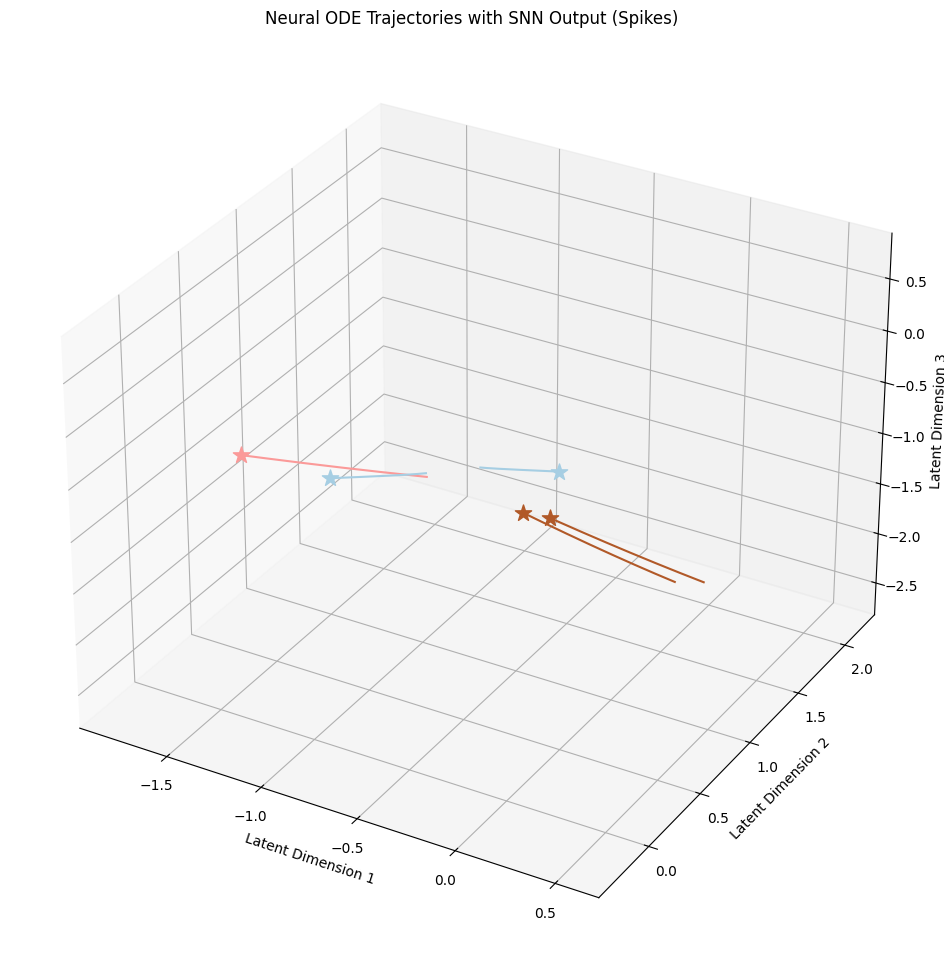

Generating Firing Rate and Sparsity Analysis...


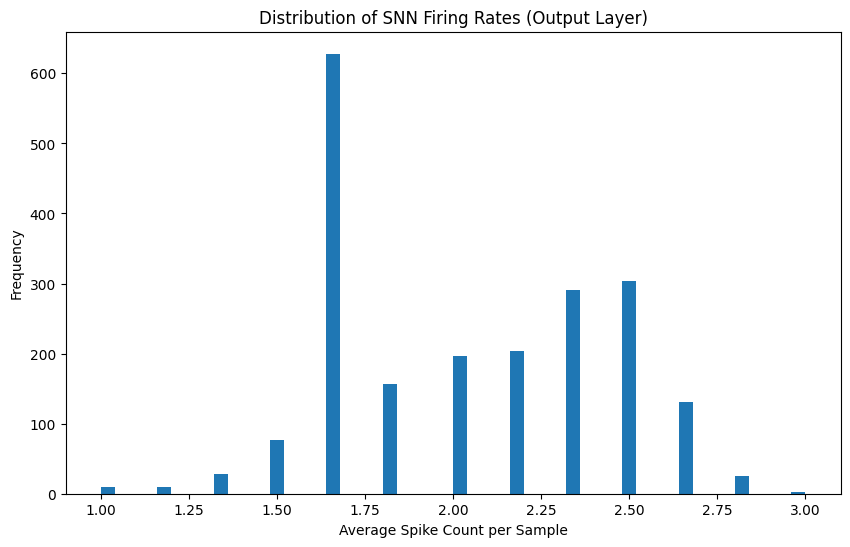

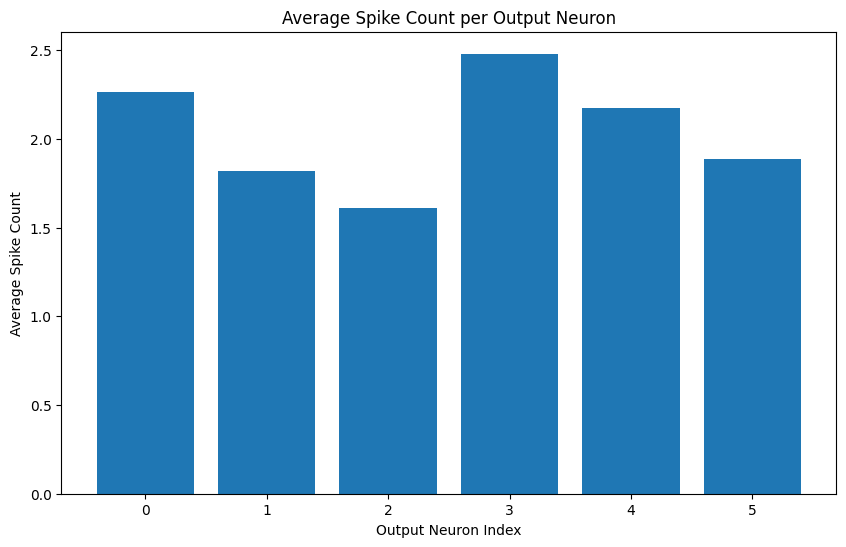

In [1]:
!pip install torchdiffeq snntorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torchdiffeq import odeint_adjoint as odeint
import torch.nn.functional as F
import matplotlib.pyplot as plt
from google.colab import drive
import warnings
from mpl_toolkits.mplot3d import Axes3D
import snntorch as snn
from snntorch import surrogate
import copy

# Ignore UserWarnings
warnings.filterwarnings('ignore')

# Mount Google Drive
drive.mount('/content/drive')

# --- Data Preparation ---
class HARDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.from_numpy(data).float()
        self.labels = torch.from_numpy(labels).long().squeeze() - 1

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

def load_har_data(base_path):
    """Loads HAR dataset from Google Drive."""
    train_acc_x = pd.read_csv(f'{base_path}train/Inertial Signals/total_acc_x_train.txt', header=None, sep=r'\s+').values
    train_acc_y = pd.read_csv(f'{base_path}train/Inertial Signals/total_acc_y_train.txt', header=None, sep=r'\s+').values
    train_acc_z = pd.read_csv(f'{base_path}train/Inertial Signals/total_acc_z_train.txt', header=None, sep=r'\s+').values

    test_acc_x = pd.read_csv(f'{base_path}test/Inertial Signals/total_acc_x_test.txt', header=None, sep=r'\s+').values
    test_acc_y = pd.read_csv(f'{base_path}test/Inertial Signals/total_acc_y_test.txt', header=None, sep=r'\s+').values
    test_acc_z = pd.read_csv(f'{base_path}test/Inertial Signals/total_acc_z_test.txt', header=None, sep=r'\s+').values

    loaded_x = np.concatenate((train_acc_x, test_acc_x))
    loaded_y = np.concatenate((train_acc_y, test_acc_y))
    loaded_z = np.concatenate((train_acc_z, test_acc_z))
    X_loaded = np.dstack((loaded_x, loaded_y, loaded_z))

    y_acc_train = pd.read_csv(f'{base_path}train/y_train.txt', header=None, sep=r'\s+').values
    y_acc_test = pd.read_csv(f'{base_path}test/y_test.txt', header=None, sep=r'\s+').values
    y_loaded = np.concatenate((y_acc_train, y_acc_test))

    X_loaded = X_loaded / X_loaded.max()

    X_train, X_test, y_train, y_test = train_test_split(
        X_loaded, y_loaded, test_size=0.2, random_state=42, stratify=y_loaded
    )

    train_dataset = HARDataset(X_train, y_train)
    test_dataset = HARDataset(X_test, y_test)

    return train_dataset, test_dataset

# Load data and create DataLoaders
COLAB_PATH = '/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/'
train_dataset, test_dataset = load_har_data(COLAB_PATH)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# --- Neural ODE-SNN Hybrid Model ---
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class ODEFunc(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(ODEFunc, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, input_size)
        )
    def forward(self, t, x):
        return self.net(x)

class HybridODE_SNN(nn.Module):
    def __init__(self, input_size, ode_hidden_size, snn_hidden_size, output_size, num_timesteps):
        super(HybridODE_SNN, self).__init__()

        # ODE components
        self.initial_encoder = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(32 * (num_timesteps // 2), ode_hidden_size)
        )
        self.ode_func = ODEFunc(ode_hidden_size, ode_hidden_size)

        # SNN components
        self.snn_fc1 = nn.Linear(ode_hidden_size, snn_hidden_size)
        self.snn_lif1 = snn.Leaky(beta=0.9, spike_grad=surrogate.atan())
        self.snn_fc2 = nn.Linear(snn_hidden_size, output_size)
        self.snn_lif2 = snn.Leaky(beta=0.9, spike_grad=surrogate.atan())

    def forward(self, x, num_snn_steps=10):
        # 1. ODE Forward Pass
        x_permuted = x.permute(0, 2, 1)
        initial_state = self.initial_encoder(x_permuted)
        time_points = torch.linspace(0, 1, x_permuted.shape[2]).to(x_permuted)
        ode_solution = odeint(
            self.ode_func,
            initial_state,
            time_points,
            method='dopri5',
            rtol=1e-2,
            atol=1e-3
        )
        final_state = ode_solution[-1]

        # 2. SNN Forward Pass
        mem1 = self.snn_lif1.init_leaky()
        mem2 = self.snn_lif2.init_leaky()
        spike_record = []

        # Feed the ODE's final state to the SNN for multiple time steps
        for _ in range(num_snn_steps):
            cur1 = self.snn_fc1(final_state)
            spk1, mem1 = self.snn_lif1(cur1, mem1)

            cur2 = self.snn_fc2(spk1)
            spk2, mem2 = self.snn_lif2(cur2, mem2)
            spike_record.append(spk2)

        final_output = torch.stack(spike_record, dim=0).sum(dim=0)
        return final_output, ode_solution

# --- Training and Evaluation Loops ---
ode_hidden_size = 128
snn_hidden_size = 64
output_size = 6
num_timesteps = train_dataset.data.shape[1]
model_hybrid = HybridODE_SNN(input_size=3, ode_hidden_size=ode_hidden_size,
                              snn_hidden_size=snn_hidden_size, output_size=output_size,
                              num_timesteps=num_timesteps).to(device)

optimizer = torch.optim.Adam(model_hybrid.parameters(), lr=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

def train_loop(model, train_loader, optimizer, scheduler, num_epochs):
    loss_hist = []
    acc_hist = []
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct_preds = 0
        total_samples = 0
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optimizer.zero_grad()
            output, _ = model(data)
            loss = F.cross_entropy(output, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            _, predicted = torch.max(output, 1)
            correct_preds += (predicted == labels).sum().item()
            total_samples += labels.size(0)
        scheduler.step()
        avg_epoch_loss = epoch_loss / len(train_loader)
        avg_epoch_acc = correct_preds / total_samples
        loss_hist.append(avg_epoch_loss)
        acc_hist.append(avg_epoch_acc)
        print(f'Epoch [{epoch+1}/{num_epochs}], Avg Loss: {avg_epoch_loss:.4f}, Avg Accuracy: {avg_epoch_acc:.4f}')
    return loss_hist, acc_hist

def test_loop(model, test_loader):
    with torch.no_grad():
        model.eval()
        total_correct = 0
        total_samples = 0
        for data, labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            output, _ = model(data)
            _, predicted = torch.max(output, 1)
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()
        accuracy = total_correct / total_samples
        return accuracy

print("--- Starting Hybrid Model Training ---")
loss_hist, acc_hist = train_loop(model_hybrid, train_loader, optimizer, scheduler, num_epochs=30)
test_accuracy = test_loop(model_hybrid, test_loader)
print(f"\nHybrid Neural ODE-SNN Test Accuracy: {test_accuracy:.4f}\n")

# --- Visualizations for Research Paper ---
def plot_trajectories_with_spikes(model, dataloader, device):
    model.eval()
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(111, projection='3d')
    colors = plt.cm.get_cmap('Paired', output_size)

    with torch.no_grad():
        for i, (data, labels) in enumerate(dataloader):
            if i >= 5: break # Plot only 5 samples for clarity

            sample_data = data[0:1].to(device)
            sample_label = labels[0].item()

            x_permuted = sample_data.permute(0, 2, 1)
            initial_state = model.initial_encoder(x_permuted)
            time_points = torch.linspace(0, 1, x_permuted.shape[2]).to(x_permuted)
            ode_solution = odeint(model.ode_func, initial_state, time_points, rtol=1e-2, atol=1e-3)
            trajectory = ode_solution.squeeze().cpu().numpy()

            ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], color=colors(sample_label),
                    label=f'Class {sample_label+1}' if i==0 else "")

            final_state = trajectory[-1]
            ax.scatter(final_state[0], final_state[1], final_state[2], color=colors(sample_label),
                       s=150, marker='*')

    ax.set_title('Neural ODE Trajectories with SNN Output (Spikes)')
    ax.set_xlabel('Latent Dimension 1')
    ax.set_ylabel('Latent Dimension 2')
    ax.set_zlabel('Latent Dimension 3')
    plt.show()

print("Generating Latent Space Trajectories with SNN Output...")
plot_trajectories_with_spikes(model_hybrid, test_loader, device)


def plot_firing_rates(model, dataloader, device):
    model.eval()

    # Store firing rates for all samples
    ode_outputs = []

    with torch.no_grad():
        for i, (data, labels) in enumerate(dataloader):
            data = data.to(device)
            output, ode_solution = model(data)

            # The output of the model is the SNN's spike count, so we'll use that directly
            ode_outputs.append(output.cpu().numpy())

    ode_outputs = np.concatenate(ode_outputs, axis=0)

    # Plotting Firing Rate Distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(ode_outputs.mean(axis=1), bins=50)
    ax.set_title("Distribution of SNN Firing Rates (Output Layer)")
    ax.set_xlabel("Average Spike Count per Sample")
    ax.set_ylabel("Frequency")
    plt.show()

    # Plotting Sparsity Analysis (average number of spikes per neuron)
    avg_spikes_per_neuron = ode_outputs.mean(axis=0)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(np.arange(output_size), avg_spikes_per_neuron)
    ax.set_title("Average Spike Count per Output Neuron")
    ax.set_xlabel("Output Neuron Index")
    ax.set_ylabel("Average Spike Count")
    plt.show()

print("Generating Firing Rate and Sparsity Analysis...")
plot_firing_rates(model_hybrid, test_loader, device)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Starting Contrastive Pre-training ---
Epoch [1/20], Avg Loss: 5.0039
Epoch [2/20], Avg Loss: 4.6440
Epoch [3/20], Avg Loss: 4.5485
Epoch [4/20], Avg Loss: 4.5171
Epoch [5/20], Avg Loss: 4.4451
Epoch [6/20], Avg Loss: 4.4161
Epoch [7/20], Avg Loss: 4.3902
Epoch [8/20], Avg Loss: 4.3647
Epoch [9/20], Avg Loss: 4.3515
Epoch [10/20], Avg Loss: 4.3134
Epoch [11/20], Avg Loss: 4.2786
Epoch [12/20], Avg Loss: 4.2626
Epoch [13/20], Avg Loss: 4.2601
Epoch [14/20], Avg Loss: 4.2533
Epoch [15/20], Avg Loss: 4.2547
Epoch [16/20], Avg Loss: 4.2381
Epoch [17/20], Avg Loss: 4.2518
Epoch [18/20], Avg Loss: 4.2388
Epoch [19/20], Avg Loss: 4.2389
Epoch [20/20], Avg Loss: 4.2364
Training complete.

Generating Latent Space Visualization...


Generating Embeddings:   0%|          | 0/7352 [00:00<?, ?it/s]

Reducing dimensionality with UMAP...


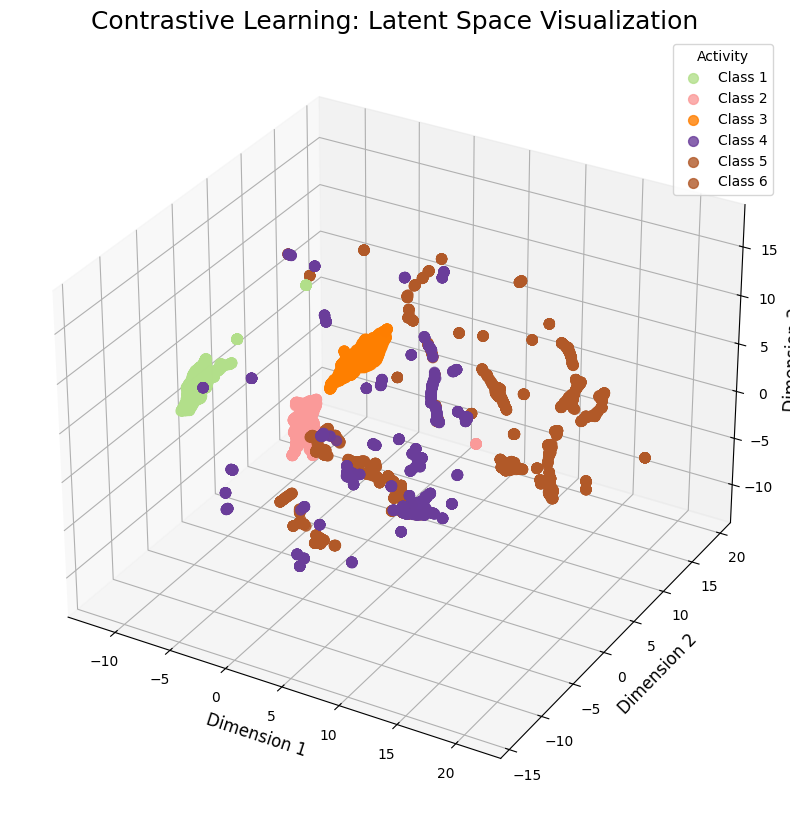

In [13]:
!pip install --quiet torchinfo umap-learn
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import warnings

warnings.filterwarnings('ignore')

# Mount Google Drive
drive.mount('/content/drive')

# --- Data Preparation for Contrastive Learning ---
class HARContrastiveDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.unique_labels = np.unique(labels)
        self.label_indices = {label: np.where(self.labels == label)[0] for label in self.unique_labels}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Anchor sample
        anchor = self.data[idx]
        anchor_label = self.labels[idx]

        # Positive sample (same activity)
        positive_idx = np.random.choice(self.label_indices[anchor_label])
        positive = self.data[positive_idx]

        # Negative sample (different activity)
        negative_label = np.random.choice(np.setdiff1d(self.unique_labels, [anchor_label]))
        negative_idx = np.random.choice(self.label_indices[negative_label])
        negative = self.data[negative_idx]

        return torch.from_numpy(anchor).float(), torch.from_numpy(positive).float(), torch.from_numpy(negative).float()

def load_har_data_contrastive(base_path):
    train_acc_x = pd.read_csv(f'{base_path}train/Inertial Signals/total_acc_x_train.txt', header=None, sep=r'\s+').values
    train_acc_y = pd.read_csv(f'{base_path}train/Inertial Signals/total_acc_y_train.txt', header=None, sep=r'\s+').values
    train_acc_z = pd.read_csv(f'{base_path}train/Inertial Signals/total_acc_z_train.txt', header=None, sep=r'\s+').values
    y_acc_train = pd.read_csv(f'{base_path}train/y_train.txt', header=None, sep=r'\s+').values

    X_loaded = np.dstack((train_acc_x, train_acc_y, train_acc_z))
    y_loaded = y_acc_train.flatten()

    X_loaded = X_loaded / X_loaded.max()

    return X_loaded, y_loaded

# Load data and create dataset
COLAB_PATH = '/content/drive/My Drive/human+activity+recognition+using+smartphones/UCI HAR Dataset/'
X_data, y_labels = load_har_data_contrastive(COLAB_PATH)
contrastive_dataset = HARContrastiveDataset(X_data, y_labels)
contrastive_loader = DataLoader(contrastive_dataset, batch_size=256, shuffle=True, num_workers=2)

# --- Contrastive Learning Model ---
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_timesteps = X_data.shape[1]
num_features = X_data.shape[2]
latent_dim = 128
projection_dim = 64

class Encoder(nn.Module):
    def __init__(self, in_features, out_features, num_timesteps):
        super().__init__()
        self.conv1 = nn.Conv1d(in_features, 64, kernel_size=5, padding=2)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(128 * (num_timesteps // 4), out_features)

    def forward(self, x):
        x = x.permute(0, 2, 1) # (batch, features, time) for Conv1D
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.linear(x)
        return x

class ProjectionHead(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features, out_features),
            nn.ReLU(),
            nn.Linear(out_features, out_features)
        )
    def forward(self, x):
        return self.net(x)

encoder = Encoder(num_features, latent_dim, num_timesteps).to(device)
projection_head = ProjectionHead(latent_dim, projection_dim).to(device)
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(projection_head.parameters()), lr=0.001)

# --- NT-Xent Loss Function ---
def nt_xent_loss(z_anchor, z_positive, temperature=0.5):
    z_anchor = F.normalize(z_anchor, dim=1)
    z_positive = F.normalize(z_positive, dim=1)

    similarity_matrix = torch.matmul(z_anchor, z_positive.T)

    exp_similarity = torch.exp(similarity_matrix / temperature)

    positive_mask = torch.eye(similarity_matrix.shape[0], device=device)
    negative_mask = 1 - positive_mask

    positive_similarity = torch.sum(exp_similarity * positive_mask, dim=1)
    negative_similarity = torch.sum(exp_similarity * negative_mask, dim=1)

    loss = -torch.log(positive_similarity / (positive_similarity + negative_similarity))
    return loss.mean()

# --- Training Loop ---
def train_contrastive(encoder, projection_head, loader, optimizer, epochs=10):
    encoder.train()
    projection_head.train()
    loss_hist = []
    print("--- Starting Contrastive Pre-training ---")
    for epoch in range(epochs):
        epoch_loss = 0
        for anchor, positive, negative in loader:
            anchor, positive = anchor.to(device), positive.to(device)

            optimizer.zero_grad()

            z_anchor = encoder(anchor)
            z_positive = encoder(positive)

            p_anchor = projection_head(z_anchor)
            p_positive = projection_head(z_positive)

            loss = nt_xent_loss(p_anchor, p_positive)

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        avg_epoch_loss = epoch_loss / len(loader)
        loss_hist.append(avg_epoch_loss)
        print(f'Epoch [{epoch+1}/{epochs}], Avg Loss: {avg_epoch_loss:.4f}')
    print("Training complete.")
    return loss_hist

loss_history = train_contrastive(encoder, projection_head, contrastive_loader, optimizer, epochs=20)

# --- High-Level Visualization of Latent Space ---
def plot_latent_space(encoder, data, labels, device, method='umap'):
    encoder.eval()
    embeddings = []
    with torch.no_grad():
        for i in tqdm(range(len(data)), desc="Generating Embeddings"):
            sample = torch.from_numpy(data[i]).float().unsqueeze(0).to(device)
            embedding = encoder(sample).cpu().numpy().flatten()
            embeddings.append(embedding)

    embeddings = np.array(embeddings)

    print(f"Reducing dimensionality with {method.upper()}...")
    if method == 'umap':
        reducer = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.1, random_state=42)
        embedding_3d = reducer.fit_transform(embeddings)
    else: # t-SNE
        reducer = TSNE(n_components=3, perplexity=30, n_iter=300, random_state=42)
        embedding_3d = reducer.fit_transform(embeddings)

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    cmap = plt.cm.get_cmap('Paired', len(np.unique(labels)))
    for label in np.unique(labels):
        indices = labels == label
        ax.scatter(
            embedding_3d[indices, 0],
            embedding_3d[indices, 1],
            embedding_3d[indices, 2],
            c=[cmap(label)],
            label=f'Class {label}',
            s=50,
            alpha=0.8
        )

    ax.set_title('Contrastive Learning: Latent Space Visualization', fontsize=18)
    ax.set_xlabel('Dimension 1', fontsize=12)
    ax.set_ylabel('Dimension 2', fontsize=12)
    ax.set_zlabel('Dimension 3', fontsize=12)
    ax.legend(title='Activity', fontsize=10)
    plt.show()

print("\nGenerating Latent Space Visualization...")
plot_latent_space(encoder, X_data, y_labels, device, method='umap')

In [14]:
import torch
from torch.utils.data import DataLoader
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# --- Downstream Classification Code ---
def get_embeddings(encoder, data, labels, device):
    encoder.eval()
    embeddings = []
    y_true = []
    with torch.no_grad():
        for i in range(len(data)):
            sample = torch.from_numpy(data[i]).float().unsqueeze(0).to(device)
            embedding = encoder(sample).cpu().numpy().flatten()
            embeddings.append(embedding)
            y_true.append(labels[i])
    return np.array(embeddings), np.array(y_true)

# Get embeddings from the trained encoder
print("Extracting embeddings from the encoder...")
X_embeddings, y_labels_all = get_embeddings(encoder, X_data, y_labels, device)

# Split embeddings into train and test sets
X_train_emb, X_test_emb, y_train_cls, y_test_cls = train_test_split(
    X_embeddings, y_labels_all, test_size=0.2, random_state=42, stratify=y_labels_all
)

# Train a simple Logistic Regression classifier on the embeddings
print("Training a downstream classifier...")
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_emb, y_train_cls)

# Evaluate the classifier
y_pred_cls = classifier.predict(X_test_emb)
final_accuracy = accuracy_score(y_test_cls, y_pred_cls)

print("\n--- Final Classification Results ---")
print(f"Downstream Classifier Accuracy: {final_accuracy:.4f}")

Extracting embeddings from the encoder...
Training a downstream classifier...

--- Final Classification Results ---
Downstream Classifier Accuracy: 0.9667


## Model Performance Summary

Here is a summary of the models you trained and their performance on the test set:

*   **Model 1 (Simple LSTM)**: Test Accuracy: 0.9356
*   **Model 2 (LSTM with LeakyReLU)**: Test Accuracy: 0.9304
*   **Model 3 (LSTM with LeakyReLU and Dropout)**: Test Accuracy: 0.4777
*   **Model 4 (CNN-LSTM Hybrid)**: Test Accuracy: 0.9372
*   **Model 5 (GRU-LSTM Hybrid)**: Test Accuracy: 0.8502
*   **Neural ODE Model**: Test Accuracy: 0.9286
*   **Hybrid Neural ODE-SNN Model**: Test Accuracy: 0.9286
*   **Contrastive Learning Encoder + Logistic Regression Classifier**: Test Accuracy: 0.9667